In [12]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import skimage

# WPC Image Explorer
#### This Jupyter notebook contains all the code necessary for explore an image in the RBG and HSV color spaces. The goal of this exploration is to find a color channel that is appropriate for removing wood flour agglomerations and foreign artifacts from the image via thresholding. 

## STEP 1: Read in the Image
### USER ACTION: Change the relative path string to an image of your choice

In [13]:
# Define a relative file path to your image.

# EXAMPLE PATH : "data/04_060__150_00_01_00C_230922_3D.tif" 
relative_path = "data/04_060__150_00_01_00C_230922_3D.tif"
img_full = utils.read_image(relative_path)# read the image

## STEP 2: Identify a portion of the image that contains agglomerations

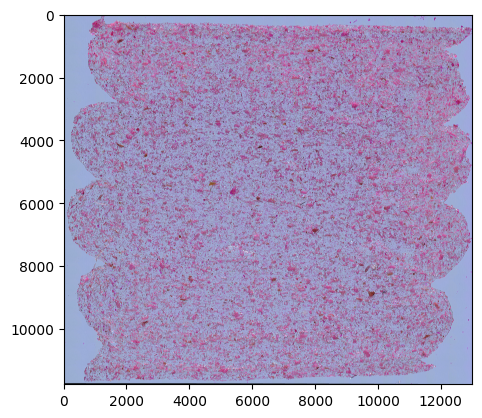

In [14]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED

# This cell takes the longest to run. 
# If you have already identified a cropped region, the next two lines of code can be commented out using '#'
# Commenting out this code may save processing time

plt.imshow(img_full)
plt.axis('on');

## STEP 2.5 : Crop the Image / Slice the Array

#### Looking at the axes of the full size image above, identify a region that contains an agglomeration you wish to remove. 

### USER ACTION: Update the code in the next cell to crop the image (Format: img_full[x1:x2, y1:y2])

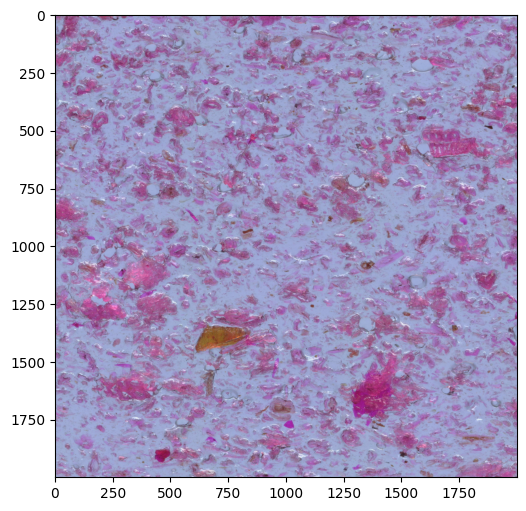

In [15]:
# Crop the image / slice the array.

# Change the dimensions below to match the coordinates of your desired crop region
# EXAMPLE CROP : img_full[4000:6000, 4000,6000]
img_crop = img_full[4000:6000, 4000:6000]
utils.print_image(img_crop, True) # print the image

## STEP 3: View the Native Color Channels & Histograms

#### The code in the next cell plots each of the images native color channels side-by-side.

*NOTE: from here on out, the analysis will only be performed on the cropped image to save on processing time*

If RGB, 
- Channel 1 : Red
- Channel 2: Green
- Channel 3: Blue

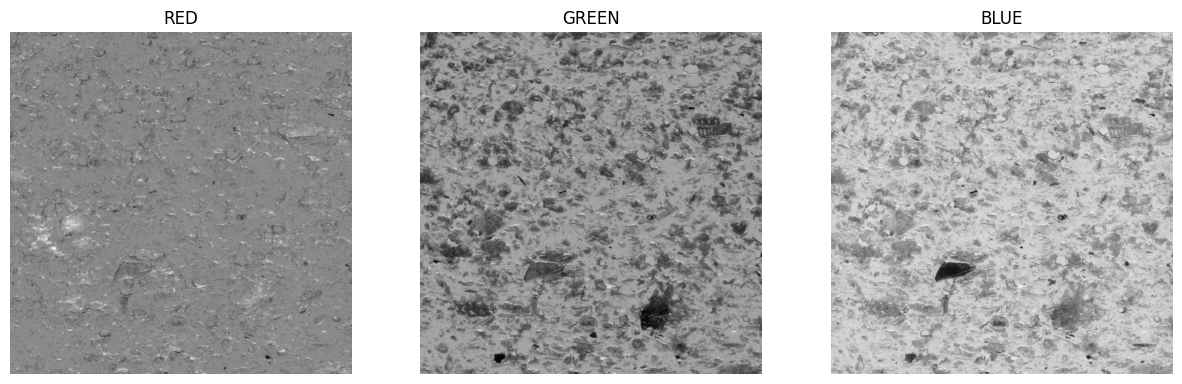

In [16]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED

labels = ['RED', 'GREEN', 'BLUE']
# PLOT EACH COLOR CHANNEL OF CROPPED IMAGE
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for each channel...
for i in range(3):
    # plot channel intensity
    axs[i].imshow(img_crop[:, :, i], cmap="gray")
    axs[i].set_title(labels[i])
    axs[i].axis("off")

## STEP 4: Native Color Space Histograms

#### If you are performing thresholding manually (i.e without an algorithm like Otsu), viewing the image data as a histogram should help you identify appropriate threshold values.

#### These first three graphs have a linear scale for the y axis.

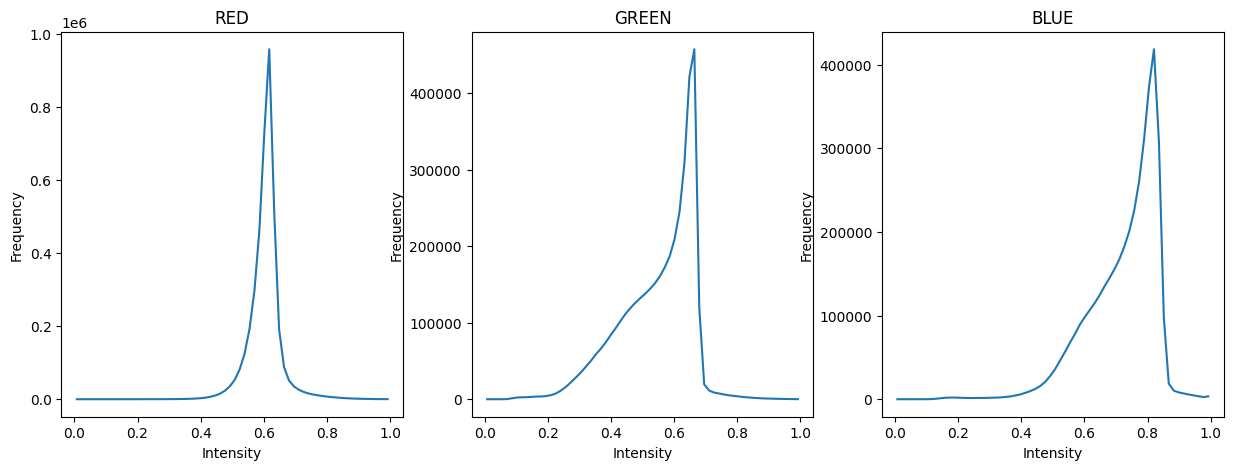

In [17]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED
# PLOT HISTOGRAM OF CHANNEL INTENSITIES


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    hist, bins = np.histogram(img_crop[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(labels[i])

#### The following histogram plots use a logarithmic y scale to stretch the peaks in the data. This may be useful for identifying more subtle details of the intensity distribution.

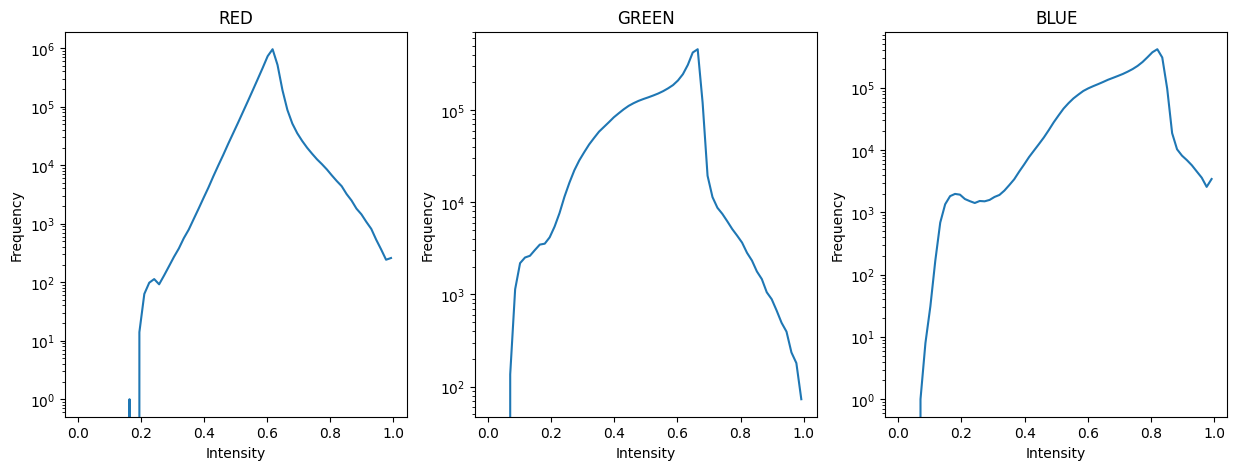

In [18]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED

# PLOT HISTOGRAM OF CHANNEL INTENSITIES (on logarithmic y-scale)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for each channel...
for i in range(3):
    # plot histogram of channel intensity
    hist, bins = np.histogram(img_crop[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_yscale("log")
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(labels[i])

## STEP 5: Viewing the HSV Color Channels & Histograms

#### The code in the next cell below will convert the color space of the cropped image from RGB to HSV. It then plots each of the color channels side-by-side.

- Channel 1 : Hue
- Channel 2: Saturation
- Channel 3: Value 

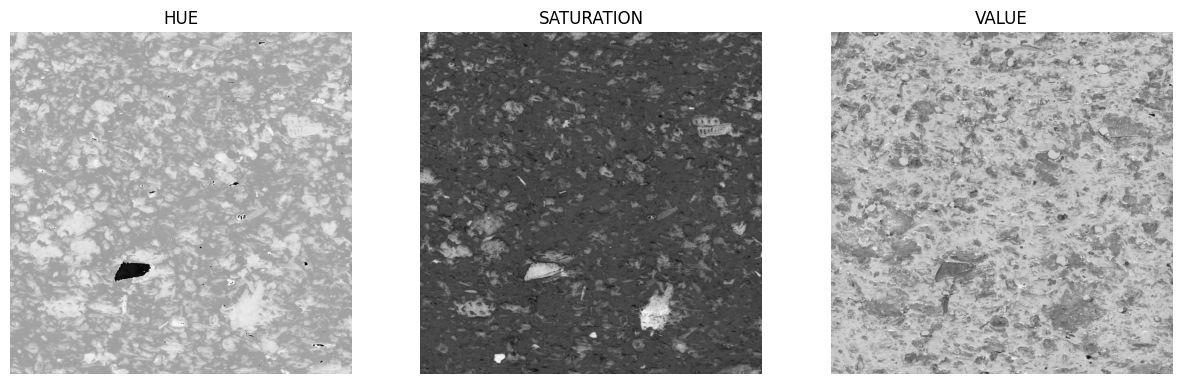

In [19]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED

hsv_labels = ['HUE', 'SATURATION', 'VALUE']

# PLOT EACH COLOR CHANNEL OF CROPPED IMAGE
img_crop_hsv = skimage.color.rgb2hsv(img_crop) # create a HSV image from RGB

fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # create figure

for i in range(3): # for each channel... plot channel intensity
    axs[i].imshow(img_crop_hsv[:, :, i], cmap="gray")
    axs[i].set_title(hsv_labels[i])
    axs[i].axis("off")

print;

#### These first three graphs have a linear scale for the y axis.

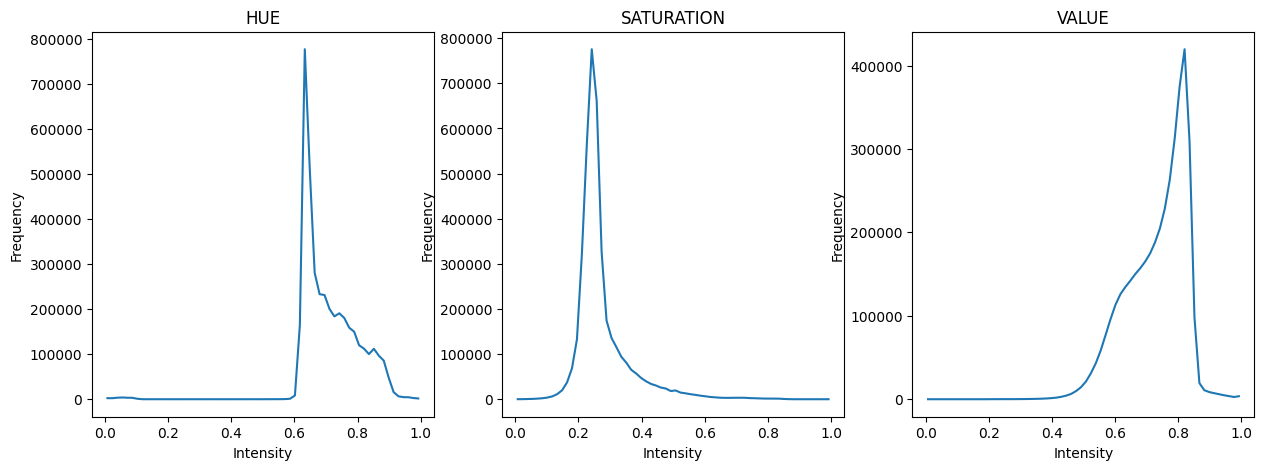

In [20]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED

# PLOT HISTOGRAM OF CHANNEL INTENSITIES
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    hist, bins = np.histogram(img_crop_hsv[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(hsv_labels[i])

#### The following histogram plots use a logarithmic y scale to stretch the peaks in the data. This may be useful for identifying more subtle details of the intensity distribution.

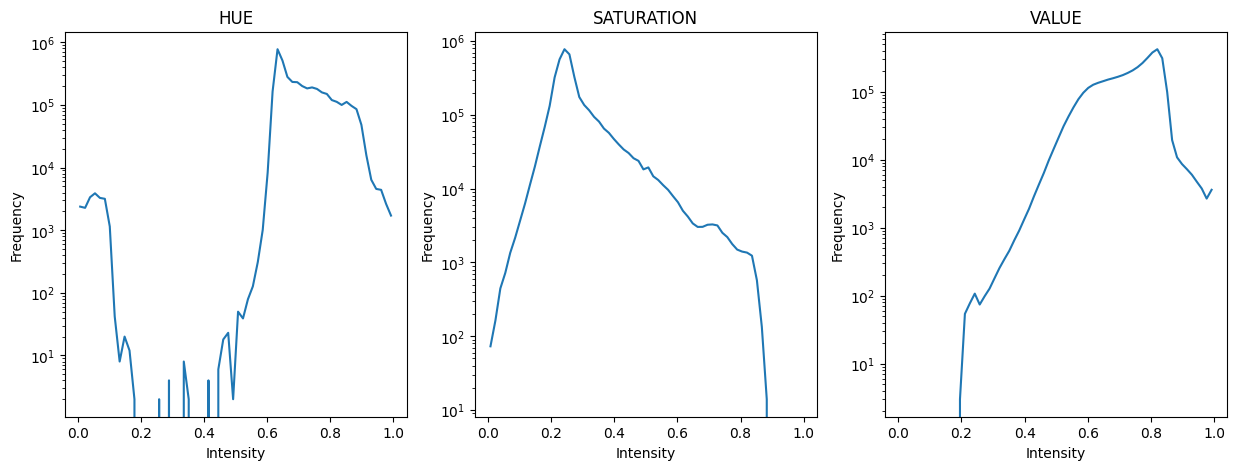

In [21]:
# NOTE: THIS CELL SHOULD NOT NEED TO BE MODIFIED

# PLOT HISTOGRAM OF CHANNEL INTENSITIES (on logarithmic y-scale)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    hist, bins = np.histogram(img_crop_hsv[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_yscale("log")
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(hsv_labels[i])